In [10]:
import numpy as np
import pandas as pd
from PIL import Image
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

In [10]:
images_dir = "train/"

In [11]:
def get_sizes(data_folder, sample_size):
    widths = []
    heights = []
    image_filenames = os.listdir(data_folder)
    image_sample = random.sample(image_filenames, sample_size)
    for image_filename in image_sample:
        image_path = os.path.join(data_folder, image_filename)
        image = Image.open(image_path)
        width, height = image.size
        widths.append(width)
        heights.append(height)
    return widths, heights    

In [14]:
widths, heights = get_sizes(images_dir, 25000)

In [15]:
wd = pd.DataFrame(widths, columns=['Widths'])
wd.describe()

,Widths
count,25000.00000
mean,404.09904
std,109.03793
min,42.00000
25%,323.00000
50%,447.00000
75%,499.00000
max,1050.00000


In [16]:
wd = pd.DataFrame(heights, columns=['Heights'])
wd.describe()

,Heights
count,25000.000000
mean,360.478080
std,97.019959
min,32.000000
25%,301.000000
50%,374.000000
75%,421.000000
max,768.000000


In [1]:
import matplotlib.pyplot as plt
import cv2

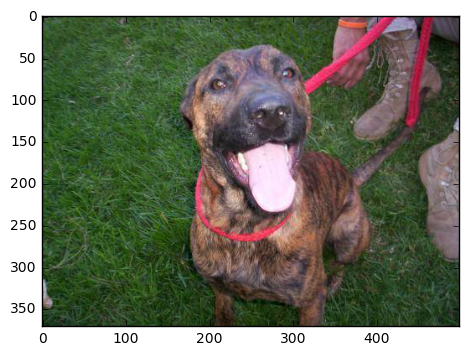

In [67]:
img = Image.open('train/dog.12224.jpg')
plt.imshow(img)
plt.show()

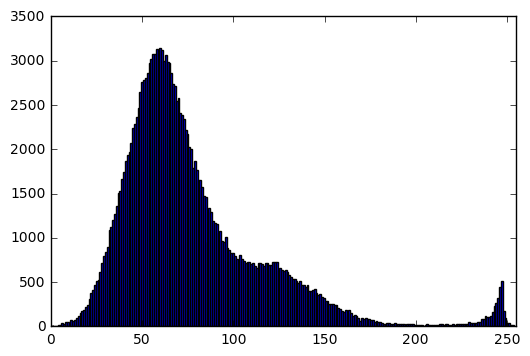

In [68]:
im = cv2.imread('train/dog.12224.jpg')
# calculate mean value from RGB channels and flatten to 1D array
vals = im.mean(axis=2).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()



In [77]:
#Histogram Equalization for collor images
img = cv2.imread('train/dog.12224.jpg')


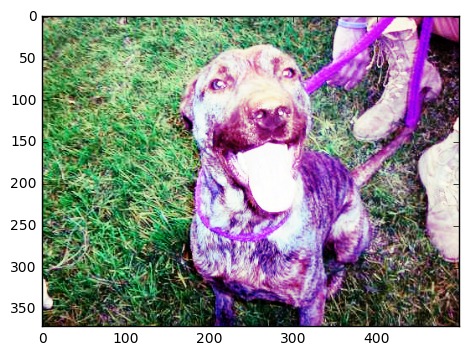

In [78]:
img[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
img[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
img[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
plt.imshow(img)
plt.show()

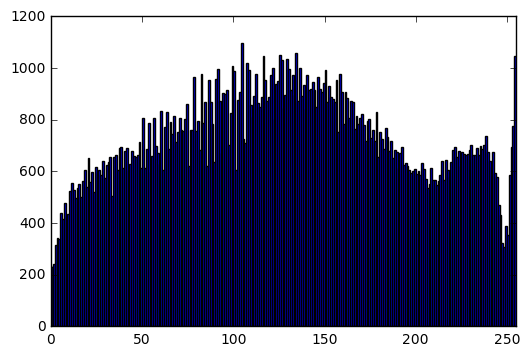

In [79]:
vals = img.mean(axis=2).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

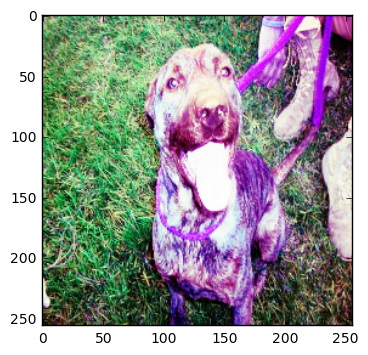

In [81]:
img_width = 256
img_height = 256
img = cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_CUBIC)
plt.imshow(img)
plt.show()